# Proposed Project Title: EDUCATIONAL DATA MINING FOR PERSONALISED LEARNING
## Import necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load the Data set

In [2]:
df = pd.read_csv("Student_Information_Data.csv")
df.head()

,Timestamp,Roll No.,Gender,Age,Address,"Study Time (Per hours in a Day, including Classes)",1st Semester CGPA,2nd Semester CGPA,3rd Semester CGPA,4th Semester CGPA,"5th Semester CGPA (If you are in 4th Sem, Expected CGPA)",Attendance (Previous Semester),"Active Backlogs (E.g. 0, 1, 2, 3)",Extra Curricular Activities,Feedback (About satisfaction of academic studies at our University),"Emotional Feedback (According to CGPA, Attendance, & Study Hours)"
0,2024/02/28 7:42:11 pm GMT+5:30,21cse241,Female,21,"Bhubaneswar, Odisha",12,7.2,7.6,8,8,9.00,92.0,0,"Any Club (Like GDSC, DSC, SARS, AIML, AR-VR, I...",Satisfactory,Happy
1,2024/02/28 7:43:28 pm GMT+5:30,21cse149,Male,20,"Ranchi , Ranchi ,Jharkhand",11,6.48,6.42,6.3,6.3,7.96,94.0,0,"NSS;GDSC Certifications ,",Good,Neutral
2,2024/02/28 7:44:16 pm GMT+5:30,21CSE296,Male,21,"Sambalpur,Odisha",11,7.26,7.8,7.65,7.85,8.20,70.0,0,NCC;Any Certification Course,Satisfactory,Sad
3,2024/02/28 7:44:41 pm GMT+5:30,21CSE285,Male,21,"Baliapal, Balasore, Odisha",11,7.74,8.82,8.26,8.3,8.57,92.0,0,NPTEL Courses;Any Certification Course,Satisfactory,Happy
4,2024/02/28 7:44:43 pm GMT+5:30,21cse439,Male,22,"Rourkela, Sundargarh",9,7.91,7.35,7.61,7.5,8.65,84.0,0,NPTEL Courses;Any Certification Course,Satisfactory,Neutral


In [3]:
new_column_names = {'Study Time (Per hours in a Day, including Classes)' : 'Study_time',
                    '1st Semester CGPA':'1st_Semester_CGPA',
                    '2nd Semester CGPA ':'2nd_Semester_CGPA',
                    '3rd Semester CGPA ':'3rd_Semester_CGPA',
                    '4th Semester CGPA':'4th_Semester_CGPA',
                    '5th Semester CGPA (If you are in 4th Sem, Expected CGPA)' : '5th_Semester_CGPA',
                    'Attendance (Previous Semester)' : 'Attendance',
                    'Active Backlogs (E.g. 0, 1, 2, 3)' : 'Backlogs',
                    'Feedback (About satisfaction of academic studies at our University)' : 'Academic_satisfaction_feedback',
                    'Emotional Feedback  (According to CGPA, Attendance, & Study Hours)':'Emotional_Feedback',
                    'Extra Curricular Activities ':'Extra_Curricular_Activities',
                    'Address ':'Address'
                    }

df = df. rename(columns=new_column_names)

In [4]:
df.columns

Index(['Timestamp', 'Roll No.', 'Gender', 'Age', 'Address', 'Study_time',
       '1st_Semester_CGPA', '2nd_Semester_CGPA', '3rd_Semester_CGPA',
       '4th_Semester_CGPA', '5th_Semester_CGPA', 'Attendance', 'Backlogs',
       'Extra_Curricular_Activities', 'Academic_satisfaction_feedback',
       'Emotional_Feedback'],
      dtype='object')

In [5]:
df.head()

,Timestamp,Roll No.,Gender,Age,Address,Study_time,1st_Semester_CGPA,2nd_Semester_CGPA,3rd_Semester_CGPA,4th_Semester_CGPA,5th_Semester_CGPA,Attendance,Backlogs,Extra_Curricular_Activities,Academic_satisfaction_feedback,Emotional_Feedback
0,2024/02/28 7:42:11 pm GMT+5:30,21cse241,Female,21,"Bhubaneswar, Odisha",12,7.2,7.6,8,8,9.00,92.0,0,"Any Club (Like GDSC, DSC, SARS, AIML, AR-VR, I...",Satisfactory,Happy
1,2024/02/28 7:43:28 pm GMT+5:30,21cse149,Male,20,"Ranchi , Ranchi ,Jharkhand",11,6.48,6.42,6.3,6.3,7.96,94.0,0,"NSS;GDSC Certifications ,",Good,Neutral
2,2024/02/28 7:44:16 pm GMT+5:30,21CSE296,Male,21,"Sambalpur,Odisha",11,7.26,7.8,7.65,7.85,8.20,70.0,0,NCC;Any Certification Course,Satisfactory,Sad
3,2024/02/28 7:44:41 pm GMT+5:30,21CSE285,Male,21,"Baliapal, Balasore, Odisha",11,7.74,8.82,8.26,8.3,8.57,92.0,0,NPTEL Courses;Any Certification Course,Satisfactory,Happy
4,2024/02/28 7:44:43 pm GMT+5:30,21cse439,Male,22,"Rourkela, Sundargarh",9,7.91,7.35,7.61,7.5,8.65,84.0,0,NPTEL Courses;Any Certification Course,Satisfactory,Neutral


## Drop the unnecessary columns

In [6]:
df.drop(['Timestamp', 'Roll No.'], axis=1, inplace=True)

## Handle the missing values

In [7]:
df.isnull().sum()

Gender                             0
Age                                0
Address                            0
Study_time                         0
1st_Semester_CGPA                  2
2nd_Semester_CGPA                  5
3rd_Semester_CGPA                 19
4th_Semester_CGPA                 20
5th_Semester_CGPA                 21
Attendance                         0
Backlogs                           0
Extra_Curricular_Activities        6
Academic_satisfaction_feedback     0
Emotional_Feedback                 0
dtype: int64

<Axes: >

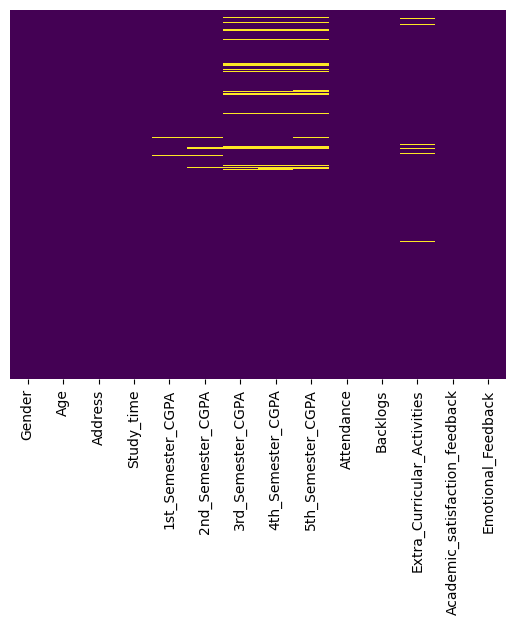

In [8]:
sns.heatmap(df.isnull(),yticklabels= False,cbar = False, cmap = 'viridis')

In [9]:
numerical_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(exclude=['number']).columns

In [10]:
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

## Remove duplicates

In [11]:
df = df.drop_duplicates()

## Remove null values if any

In [12]:
df.isnull().sum()

Gender                            0
Age                               0
Address                           0
Study_time                        0
1st_Semester_CGPA                 0
2nd_Semester_CGPA                 0
3rd_Semester_CGPA                 0
4th_Semester_CGPA                 0
5th_Semester_CGPA                 0
Attendance                        0
Backlogs                          0
Extra_Curricular_Activities       0
Academic_satisfaction_feedback    0
Emotional_Feedback                0
dtype: int64

<Axes: >

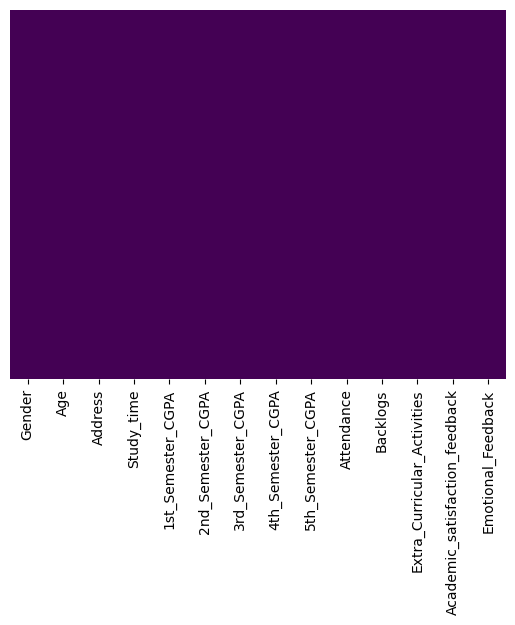

In [13]:
sns.heatmap(df.isnull(),yticklabels= False,cbar = False, cmap = 'viridis')

In [14]:
# Dropping rows with any missing value
df = df.dropna(axis=0, how='any')

In [15]:
df['Extra_Curricular_Activities']=df['Extra_Curricular_Activities'].str.strip()

In [16]:
df.head(2)

,Gender,Age,Address,Study_time,1st_Semester_CGPA,2nd_Semester_CGPA,3rd_Semester_CGPA,4th_Semester_CGPA,5th_Semester_CGPA,Attendance,Backlogs,Extra_Curricular_Activities,Academic_satisfaction_feedback,Emotional_Feedback
0,Female,21,"Bhubaneswar, Odisha",12,7.2,7.6,8,8,9.00,92.0,0,"Any Club (Like GDSC, DSC, SARS, AIML, AR-VR, I...",Satisfactory,Happy
1,Male,20,"Ranchi , Ranchi ,Jharkhand",11,6.48,6.42,6.3,6.3,7.96,94.0,0,"NSS;GDSC Certifications ,",Good,Neutral


## Observe the cleaned data 

In [17]:
summary = df.describe()

In [18]:
print("\nSummary Statistics:")
print(summary)


Summary Statistics:
              Age  Study_time  5th_Semester_CGPA  Attendance    Backlogs
count  350.000000  350.000000         350.000000  350.000000  350.000000
mean    21.262857   11.314286           7.791611   83.711686    0.728571
std      2.986990    4.727966           0.915359    8.837837    1.376444
min     18.000000    0.000000           0.000000    8.000000    0.000000
25%     20.000000    9.000000           7.327500   78.030000    0.000000
50%     21.000000   11.000000           7.890000   85.000000    0.000000
75%     22.000000   12.000000           8.300000   89.182500    1.000000
max     70.000000   78.000000           9.800000   99.000000    8.000000


In [19]:
df.count()
df.isnull().sum()

Gender                            0
Age                               0
Address                           0
Study_time                        0
1st_Semester_CGPA                 0
2nd_Semester_CGPA                 0
3rd_Semester_CGPA                 0
4th_Semester_CGPA                 0
5th_Semester_CGPA                 0
Attendance                        0
Backlogs                          0
Extra_Curricular_Activities       0
Academic_satisfaction_feedback    0
Emotional_Feedback                0
dtype: int64

In [20]:
df.head()

,Gender,Age,Address,Study_time,1st_Semester_CGPA,2nd_Semester_CGPA,3rd_Semester_CGPA,4th_Semester_CGPA,5th_Semester_CGPA,Attendance,Backlogs,Extra_Curricular_Activities,Academic_satisfaction_feedback,Emotional_Feedback
0,Female,21,"Bhubaneswar, Odisha",12,7.2,7.6,8,8,9.00,92.0,0,"Any Club (Like GDSC, DSC, SARS, AIML, AR-VR, I...",Satisfactory,Happy
1,Male,20,"Ranchi , Ranchi ,Jharkhand",11,6.48,6.42,6.3,6.3,7.96,94.0,0,"NSS;GDSC Certifications ,",Good,Neutral
2,Male,21,"Sambalpur,Odisha",11,7.26,7.8,7.65,7.85,8.20,70.0,0,NCC;Any Certification Course,Satisfactory,Sad
3,Male,21,"Baliapal, Balasore, Odisha",11,7.74,8.82,8.26,8.3,8.57,92.0,0,NPTEL Courses;Any Certification Course,Satisfactory,Happy
4,Male,22,"Rourkela, Sundargarh",9,7.91,7.35,7.61,7.5,8.65,84.0,0,NPTEL Courses;Any Certification Course,Satisfactory,Neutral


## Adding sentiment column 

In [21]:
pip install vaderSentiment 

Note: you may need to restart the kernel to use updated packages.


In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to assign sentiment labels using VADER
def get_sentiment(row):
    academic_sentiment = analyzer.polarity_scores(row['Academic_satisfaction_feedback'])['compound']
    emotional_sentiment = analyzer.polarity_scores(row['Emotional_Feedback'])['compound']
    if academic_sentiment >= 0.05 or emotional_sentiment >= 0.05:
        return 1  # Positive sentiment
    elif academic_sentiment <= -0.05 or emotional_sentiment <= -0.05:
        return 0  # Negative sentiment
    else:
        return -1  # Neutral sentiment (if needed)

# Assign sentiment labels to each row
df['Sentiment'] = df.apply(get_sentiment, axis=1)

print(df)

     Gender  Age                                  Address  Study_time  \
0    Female   21                     Bhubaneswar, Odisha           12   
1      Male   20              Ranchi , Ranchi ,Jharkhand           11   
2      Male   21                         Sambalpur,Odisha          11   
3      Male   21              Baliapal, Balasore, Odisha           11   
4      Male   22                    Rourkela, Sundargarh            9   
..      ...  ...                                      ...         ...   
345    Male   20                         Rayagada, Odisha          10   
346  Female   19             Rourkela, S\ndargarh, Odisha          12   
347    Male   20  Daringbadi, Phulbani, Kandhamal, Odisha          12   
348  Female   19                     Bangalore, Karnataka          13   
349  Female   19                 Jeypore, Koraput, Odisha          14   

    1st_Semester_CGPA 2nd_Semester_CGPA 3rd_Semester_CGPA 4th_Semester_CGPA  \
0                 7.2               7.6     

## To perform sentiment analysis on your dataset, we would typically follow these steps:
### 1.Prepare the Data: Preprocess the text data by tokenizing, removing stopwords, punctuation, and normalizing the text (which you've already done).
### 2.Feature Engineering: Convert the textual data into numerical features that can be used as input to machine learning models. Common methods include Bag-of-Words, TF-IDF, word embeddings (like Word2Vec or GloVe), or more advanced methods like BERT embeddings.
### 3.Train-Test Split: Split your dataset into training and testing sets to evaluate the performance of your sentiment analysis model.
### 4.Train a Model: Choose an appropriate machine learning or deep learning model for sentiment analysis and train it on the training data.
### 5.Evaluate the Model: Evaluate the performance of your trained model using the testing data. Common evaluation metrics for sentiment analysis include accuracy, precision, recall, F1-score, and confusion matrix.

# Label Encodeing

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
# Creating an  instance of labelEncode
encoder=LabelEncoder()


In [25]:
df['Emotional_Feedback']=encoder.fit_transform(df['Emotional_Feedback'])

In [26]:
df['Academic_satisfaction_feedback']=encoder.fit_transform(df['Academic_satisfaction_feedback'])

In [27]:
df['Gender']=encoder.fit_transform(df['Gender'])

In [28]:
df.head(50)

,Gender,Age,Address,Study_time,1st_Semester_CGPA,2nd_Semester_CGPA,3rd_Semester_CGPA,4th_Semester_CGPA,5th_Semester_CGPA,Attendance,Backlogs,Extra_Curricular_Activities,Academic_satisfaction_feedback,Emotional_Feedback,Sentiment
0,0,21,"Bhubaneswar, Odisha",12,7.2,7.6,8,8,9.000000,92.00,0,"Any Club (Like GDSC, DSC, SARS, AIML, AR-VR, I...",3,2,1
1,1,20,"Ranchi , Ranchi ,Jharkhand",11,6.48,6.42,6.3,6.3,7.960000,94.00,0,"NSS;GDSC Certifications ,",2,3,1
2,1,21,"Sambalpur,Odisha",11,7.26,7.8,7.65,7.85,8.200000,70.00,0,NCC;Any Certification Course,3,4,1
3,1,21,"Baliapal, Balasore, Odisha",11,7.74,8.82,8.26,8.3,8.570000,92.00,0,NPTEL Courses;Any Certification Course,3,2,1
4,1,22,"Rourkela, Sundargarh",9,7.91,7.35,7.61,7.5,8.650000,84.00,0,NPTEL Courses;Any Certification Course,3,3,1
5,1,20,"Gunupur, Rayagada, Odisha",10,7.48,7.65,7.39,7,7.870000,80.00,0,NPTEL Courses;Any Certification Course;Web Dev...,3,4,1
6,1,21,"Balangir, Odisha",7,6.96,6.78,6.49,6.31,6.570000,84.00,1,"NPTEL Courses;Any Club (Like GDSC, DSC, SARS, ...",3,3,1
7,1,18,"Dhanagar, Kalahandi, Odisha",10,9.2,9.23,8,7,7.791611,94.00,0,NPTEL Courses;Any Certification Course,1,2,1
8,1,21,"Rayagada, Rayagada,ODISHA",9,6.35,6.41,6.51,6.54,6.530000,82.00,1,Any Certification Course,3,4,1
9,1,21,"At- Champeipal, Po-Tarangasagar, Dist- Jajpur,...",14,7.57,7.87,8.39,7.6,8.610000,76.00,0,"NPTEL Courses;Any Club (Like GDSC, DSC, SARS, ...",3,3,1


# Feature Scaling  
## => Normaliization ( Standardisation)

In [29]:
df.columns

Index(['Gender', 'Age', 'Address', 'Study_time', '1st_Semester_CGPA',
       '2nd_Semester_CGPA', '3rd_Semester_CGPA', '4th_Semester_CGPA',
       '5th_Semester_CGPA', 'Attendance', 'Backlogs',
       'Extra_Curricular_Activities', 'Academic_satisfaction_feedback',
       'Emotional_Feedback', 'Sentiment'],
      dtype='object')

In [30]:
df['1st_Semester_CGPA'] = df['1st_Semester_CGPA'].str.strip()
df['1st_Semester_CGPA'] = pd.to_numeric(df['1st_Semester_CGPA'], errors='coerce')

In [31]:
df['2nd_Semester_CGPA'] = df['2nd_Semester_CGPA'].str.strip()
df['2nd_Semester_CGPA'] = pd.to_numeric(df['2nd_Semester_CGPA'], errors='coerce')


In [32]:
df['3rd_Semester_CGPA'] = df['3rd_Semester_CGPA'].str.replace(',','.')
df['3rd_Semester_CGPA'] = pd.to_numeric(df['3rd_Semester_CGPA'], errors='coerce')

In [33]:
df['4th_Semester_CGPA'] = df['4th_Semester_CGPA'].str.strip()
df['4th_Semester_CGPA'] = pd.to_numeric(df['4th_Semester_CGPA'], errors='coerce')

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler=StandardScaler()
scaler

StandardScaler()

In [36]:
scaler.fit(df[['Gender','Age','Study_time','1st_Semester_CGPA','2nd_Semester_CGPA','3rd_Semester_CGPA','4th_Semester_CGPA','5th_Semester_CGPA','Attendance','Backlogs','Academic_satisfaction_feedback','Emotional_Feedback','Sentiment']])

StandardScaler()

In [37]:
df.head(2)

,Gender,Age,Address,Study_time,1st_Semester_CGPA,2nd_Semester_CGPA,3rd_Semester_CGPA,4th_Semester_CGPA,5th_Semester_CGPA,Attendance,Backlogs,Extra_Curricular_Activities,Academic_satisfaction_feedback,Emotional_Feedback,Sentiment
0,0,21,"Bhubaneswar, Odisha",12,7.20,7.60,8.0,8.0,9.00,92.0,0,"Any Club (Like GDSC, DSC, SARS, AIML, AR-VR, I...",3,2,1
1,1,20,"Ranchi , Ranchi ,Jharkhand",11,6.48,6.42,6.3,6.3,7.96,94.0,0,"NSS;GDSC Certifications ,",2,3,1


In [38]:
normalized_data=pd.DataFrame(scaler.transform(df[['Gender','Age','Study_time','1st_Semester_CGPA','2nd_Semester_CGPA','3rd_Semester_CGPA','4th_Semester_CGPA','5th_Semester_CGPA','Attendance','Backlogs','Academic_satisfaction_feedback','Emotional_Feedback','Sentiment']]),columns=['Gender','Age','Study_time','1st_Semester_CGPA','2nd_Semester_CGPA','3rd_Semester_CGPA','4th_Semester_CGPA','5th_Semester_CGPA','Attendance','Backlogs','Academic_satisfaction_feedback','Emotional_Feedback','Sentiment'])

<Axes: ylabel='Count'>

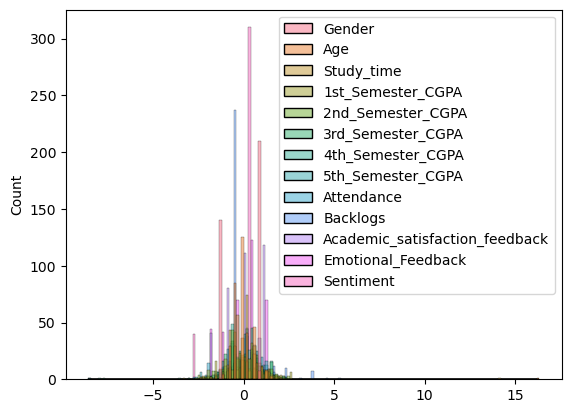

In [39]:
sns.histplot(normalized_data)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          350 non-null    int32  
 1   Age                             350 non-null    int64  
 2   Address                         350 non-null    object 
 3   Study_time                      350 non-null    int64  
 4   1st_Semester_CGPA               349 non-null    float64
 5   2nd_Semester_CGPA               348 non-null    float64
 6   3rd_Semester_CGPA               349 non-null    float64
 7   4th_Semester_CGPA               349 non-null    float64
 8   5th_Semester_CGPA               350 non-null    float64
 9   Attendance                      350 non-null    float64
 10  Backlogs                        350 non-null    int64  
 11  Extra_Curricular_Activities     350 non-null    object 
 12  Academic_satisfaction_feedback  350 


# Train-Test Split 

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [42]:
# Split data into features and target
X = df[['Academic_satisfaction_feedback', 'Emotional_Feedback']]
y = df['Sentiment']

In [43]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the model

In [44]:
# Train a sentiment classifier (for demonstration, using Support Vector Machine)
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [45]:
# Predict sentiment labels for test data
y_pred = svc.predict(X_test)

In [46]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9857142857142858


In [47]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.98      0.99        55

    accuracy                           0.99        70
   macro avg       0.97      0.99      0.98        70
weighted avg       0.99      0.99      0.99        70



### Here, by following the accuracy and the classification report, we reached out to a conclusion i.e. our model is having 98 percent of accuracy and also having the highest performance to handle the further approaches.

## Sentiment Analysis 

In [48]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [49]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [50]:
# Define sentiment lexicon for emotional feedback
emotional_lexicon = {
    0: -1,  # Angry
    1: 1,   # Glad
    2: 1,   # Happy
    3: 0,   # Neutral
    4: -1   # Sad
}

In [51]:
# Map academic satisfaction attributes to sentiment scores
academic_mapping = {
    0: -1,  # Bad
    1: 0,   # Satisfactory
    2: 1,   # Good
    3: 1    # Excellent
}

In [52]:
# Function to calculate sentiment score for emotional feedback
def calculate_emotional_sentiment(label):
    return emotional_lexicon.get(label, 0)  # Default to 0 if label not found in lexicon

In [53]:
# Function to calculate sentiment score for academic satisfaction feedback
def calculate_academic_sentiment(label):
    return academic_mapping.get(label, 0)  # Default to 0 if label not found in mapping

In [54]:
# Calculate sentiment scores for each row
df['Emotional_Sentiment'] = df['Emotional_Feedback'].apply(calculate_emotional_sentiment)
df['Academic_Sentiment'] = df['Academic_satisfaction_feedback'].apply(calculate_academic_sentiment)

In [55]:
df.head(50)

,Gender,Age,Address,Study_time,1st_Semester_CGPA,2nd_Semester_CGPA,3rd_Semester_CGPA,4th_Semester_CGPA,5th_Semester_CGPA,Attendance,Backlogs,Extra_Curricular_Activities,Academic_satisfaction_feedback,Emotional_Feedback,Sentiment,Emotional_Sentiment,Academic_Sentiment
0,0,21,"Bhubaneswar, Odisha",12,7.20,7.60,8.00,8.00,9.000000,92.00,0,"Any Club (Like GDSC, DSC, SARS, AIML, AR-VR, I...",3,2,1,1,1
1,1,20,"Ranchi , Ranchi ,Jharkhand",11,6.48,6.42,6.30,6.30,7.960000,94.00,0,"NSS;GDSC Certifications ,",2,3,1,0,1
2,1,21,"Sambalpur,Odisha",11,7.26,7.80,7.65,7.85,8.200000,70.00,0,NCC;Any Certification Course,3,4,1,-1,1
3,1,21,"Baliapal, Balasore, Odisha",11,7.74,8.82,8.26,8.30,8.570000,92.00,0,NPTEL Courses;Any Certification Course,3,2,1,1,1
4,1,22,"Rourkela, Sundargarh",9,7.91,7.35,7.61,7.50,8.650000,84.00,0,NPTEL Courses;Any Certification Course,3,3,1,0,1
5,1,20,"Gunupur, Rayagada, Odisha",10,7.48,7.65,7.39,7.00,7.870000,80.00,0,NPTEL Courses;Any Certification Course;Web Dev...,3,4,1,-1,1
6,1,21,"Balangir, Odisha",7,6.96,6.78,6.49,6.31,6.570000,84.00,1,"NPTEL Courses;Any Club (Like GDSC, DSC, SARS, ...",3,3,1,0,1
7,1,18,"Dhanagar, Kalahandi, Odisha",10,9.20,9.23,8.00,7.00,7.791611,94.00,0,NPTEL Courses;Any Certification Course,1,2,1,1,0
8,1,21,"Rayagada, Rayagada,ODISHA",9,6.35,6.41,6.51,6.54,6.530000,82.00,1,Any Certification Course,3,4,1,-1,1
9,1,21,"At- Champeipal, Po-Tarangasagar, Dist- Jajpur,...",14,7.57,7.87,8.39,7.60,8.610000,76.00,0,"NPTEL Courses;Any Club (Like GDSC, DSC, SARS, ...",3,3,1,0,1


## Aggregate Sentiment Analysis 

In [56]:
# Method 1: Averaging sentiment scores
df['Overall_Sentiment_Average'] = (df['Emotional_Sentiment'] + df['Academic_Sentiment']) / 2

In [57]:
# Method 2: Weighted sum (assigning more weight to emotional sentiment)
weight_emotional = 0.7
weight_academic = 0.3
df['Overall_Sentiment_Weighted_Sum'] = (weight_emotional * df['Emotional_Sentiment']) + (weight_academic * df['Academic_Sentiment'])

In [58]:
df.head(50)

,Gender,Age,Address,Study_time,1st_Semester_CGPA,2nd_Semester_CGPA,3rd_Semester_CGPA,4th_Semester_CGPA,5th_Semester_CGPA,Attendance,Backlogs,Extra_Curricular_Activities,Academic_satisfaction_feedback,Emotional_Feedback,Sentiment,Emotional_Sentiment,Academic_Sentiment,Overall_Sentiment_Average,Overall_Sentiment_Weighted_Sum
0,0,21,"Bhubaneswar, Odisha",12,7.20,7.60,8.00,8.00,9.000000,92.00,0,"Any Club (Like GDSC, DSC, SARS, AIML, AR-VR, I...",3,2,1,1,1,1.0,1.0
1,1,20,"Ranchi , Ranchi ,Jharkhand",11,6.48,6.42,6.30,6.30,7.960000,94.00,0,"NSS;GDSC Certifications ,",2,3,1,0,1,0.5,0.3
2,1,21,"Sambalpur,Odisha",11,7.26,7.80,7.65,7.85,8.200000,70.00,0,NCC;Any Certification Course,3,4,1,-1,1,0.0,-0.4
3,1,21,"Baliapal, Balasore, Odisha",11,7.74,8.82,8.26,8.30,8.570000,92.00,0,NPTEL Courses;Any Certification Course,3,2,1,1,1,1.0,1.0
4,1,22,"Rourkela, Sundargarh",9,7.91,7.35,7.61,7.50,8.650000,84.00,0,NPTEL Courses;Any Certification Course,3,3,1,0,1,0.5,0.3
5,1,20,"Gunupur, Rayagada, Odisha",10,7.48,7.65,7.39,7.00,7.870000,80.00,0,NPTEL Courses;Any Certification Course;Web Dev...,3,4,1,-1,1,0.0,-0.4
6,1,21,"Balangir, Odisha",7,6.96,6.78,6.49,6.31,6.570000,84.00,1,"NPTEL Courses;Any Club (Like GDSC, DSC, SARS, ...",3,3,1,0,1,0.5,0.3
7,1,18,"Dhanagar, Kalahandi, Odisha",10,9.20,9.23,8.00,7.00,7.791611,94.00,0,NPTEL Courses;Any Certification Course,1,2,1,1,0,0.5,0.7
8,1,21,"Rayagada, Rayagada,ODISHA",9,6.35,6.41,6.51,6.54,6.530000,82.00,1,Any Certification Course,3,4,1,-1,1,0.0,-0.4
9,1,21,"At- Champeipal, Po-Tarangasagar, Dist- Jajpur,...",14,7.57,7.87,8.39,7.60,8.610000,76.00,0,"NPTEL Courses;Any Club (Like GDSC, DSC, SARS, ...",3,3,1,0,1,0.5,0.3


## Visualization and Analysis

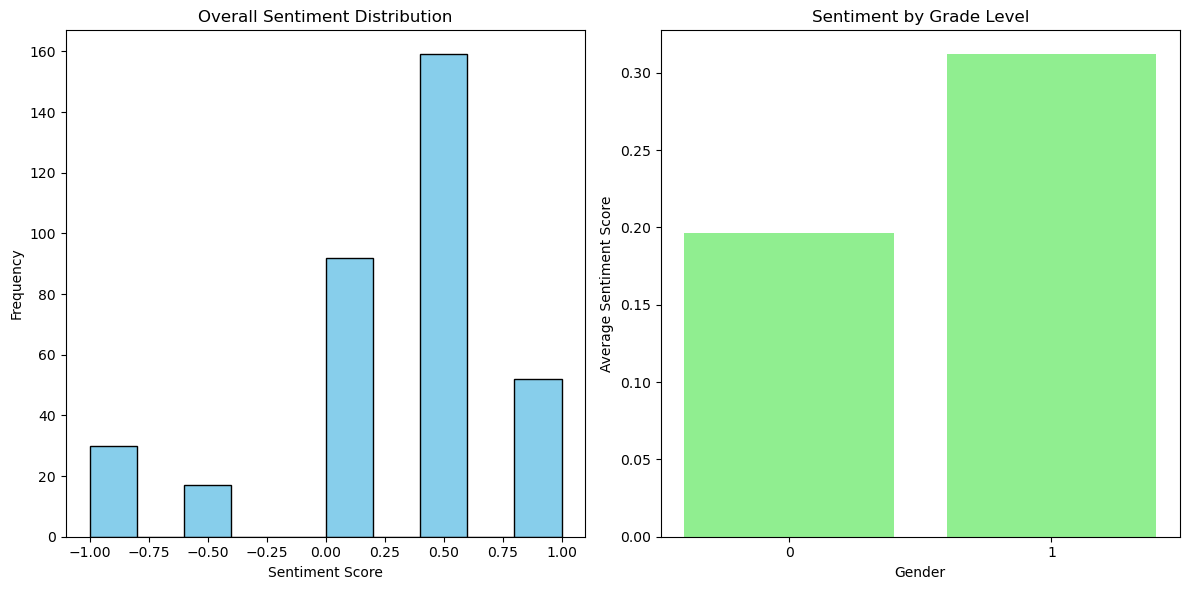

In [59]:
# Visualize sentiment distributions using histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Overall_Sentiment_Average'], bins=10, color='skyblue', edgecolor='black')
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# Analyze trends and patterns in sentiment across different groups (Gender)
plt.subplot(1, 2, 2)
plt.bar(df.groupby('Gender')['Gender'].mean().index.astype(str), df.groupby('Gender')['Overall_Sentiment_Average'].mean(), color='lightgreen')
plt.title('Sentiment by Grade Level')
plt.xlabel('Gender')
plt.ylabel('Average Sentiment Score')
plt.tight_layout()

## Model Evaluation and Iteration using SVR
### 1.split the dataset into training and testing sets:

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
# Features and target variable
X = df[['Emotional_Feedback', 'Academic_satisfaction_feedback']]
y = df['Overall_Sentiment_Average']

In [62]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2.train a Support Vector Regression (SVR)  model and evaluate its performance:

In [63]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [64]:
# Train the SVR model
svr = SVR(kernel='linear')  # You can choose different kernels (linear, rbf, polynomial, etc.)
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [65]:
# Make predictions on the testing set
y_pred = svr.predict(X_test)

In [66]:
# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [67]:
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 0.38295159592857103
Mean Absolute Error: 0.41780714285713905
R^2 Score: 0.03137807714543883


### Summary:
### Mean Squared Error (MSE): The MSE value of approximately 0.38 indicates that, on average, the squared difference between the actual and predicted sentiment scores is around 0.38. Lower MSE values are desirable, so this value suggests that the model's predictions are relatively close to the actual sentiment scores.
### Mean Absolute Error (MAE): The MAE value of approximately 0. indicates that, on average, the absolute difference between the actual and predicted sentiment scores is around 0.41. Similar to MSE, lower MAE values are better, indicating that the model's predictions are reasonably accurate.
### R-squared Score (R^2): The R^2 score of approximately 0.031 means that the model explains around 31% of the variance in the target variable (Overall Sentiment).

## Model Evaluation and Iteration using Linear regression 
### 1.split the dataset into training and testing sets:

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
# Features and target variable
X = df[['Emotional_Feedback', 'Academic_satisfaction_feedback']]
y = df['Overall_Sentiment_Average']

In [70]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2.train a Linear Regression model and evaluate its performance:

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [72]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [73]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [74]:
# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [75]:
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 0.2705487780533085
Mean Absolute Error: 0.43472332277927095
R^2 Score: 0.31568511422830703


### Summary:
### Mean Squared Error (MSE): The MSE value of approximately 0.27 indicates that, on average, the squared difference between the actual and predicted sentiment scores is around 0.27. Lower MSE values are desirable, so this value suggests that the model's predictions are relatively close to the actual sentiment scores.
### Mean Absolute Error (MAE): The MAE value of approximately 0.43 indicates that, on average, the absolute difference between the actual and predicted sentiment scores is around 0.43. Similar to MSE, lower MAE values are better, indicating that the model's predictions are reasonably accurate.
### R-squared Score (R^2): The R^2 score of approximately 0.31 means that the model explains around 31% of the variance in the target variable (Overall Sentiment).

## Model Evaluation and Iteration using Decision Tree
### 1.split the dataset into training and testing sets:

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
# Features and target variable
X = df[['Emotional_Feedback', 'Academic_satisfaction_feedback']]
y = df['Overall_Sentiment_Average']

In [78]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2.train a Decision Tree model and evaluate its performance:

In [79]:
from sklearn.tree import DecisionTreeRegressor

In [80]:
# Train the Decision Tree model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [81]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [82]:
# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [83]:
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 0.0035714285714285713
Mean Absolute Error: 0.007142857142857143
R^2 Score: 0.99096657633243


### Summary:
### Mean Squared Error (MSE): The MSE value of approximately 0.00357 indicates that, on average, the squared difference between the actual and predicted sentiment scores is around 0.00357. Lower MSE values are desirable, so this value suggests that the model's predictions are very close to the actual sentiment scores.
### Mean Absolute Error (MAE): The MAE value of approximately 0.00714 indicates that, on average, the absolute difference between the actual and predicted sentiment scores is around 0.00714. Similarly to MSE, lower MAE values are better, indicating that the model's predictions are very accurate.
### R-squared Score (R^2): The R^2 score of approximately 0.991 means that the model explains around 99.1% of the variance in the target variable (Overall Sentiment). This is an exceptionally high value and suggests that the model provides a very good fit to the data.

## Model Evaluation and Iteration using Random Forest

In [84]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 0.0035714285714285713
Mean Absolute Error: 0.007142857142857143
R^2 Score: 0.99096657633243


### Summary:
### Mean Squared Error (MSE): The MSE value of approximately 0.00364 indicates that, on average, the squared difference between the actual and predicted sentiment scores is around 0.00364. Lower MSE values are desirable, so this value suggests that the model's predictions are very close to the actual sentiment scores.
### Mean Absolute Error (MAE): The MAE value of approximately 0.0075 indicates that, on average, the absolute difference between the actual and predicted sentiment scores is around 0.0075. Similarly to MSE, lower MAE values are better, indicating that the model's predictions are very accurate.
###  R-squared Score (R^2): The R^2 score of approximately 0.991 means that the model explains around 99.1% of the variance in the target variable (Overall Sentiment). This is an exceptionally high value and suggests that the model provides a very good fit to the data.

## Model Evaluation and Iteration using Gradient Boosting Machines (GBM)

In [85]:
from sklearn.ensemble import GradientBoostingRegressor

# Train the Gradient Boosting model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 0.002741543002135901
Mean Absolute Error: 0.008095699581422512
R^2 Score: 0.9930656545564764


### Summary:
### Mean Squared Error (MSE): The MSE value of approximately 0.00274 indicates that, on average, the squared difference between the actual and predicted sentiment scores is around 0.00274. Lower MSE values are desirable, so this value suggests that the model's predictions are very close to the actual sentiment scores.
### Mean Absolute Error (MAE): The MAE value of approximately 0.0081 indicates that, on average, the absolute difference between the actual and predicted sentiment scores is around 0.0081. Similarly to MSE, lower MAE values are better, indicating that the model's predictions are very accurate.
### R-squared Score (R^2): The R^2 score of approximately 0.993 means that the model explains around 99.3% of the variance in the target variable (Overall Sentiment). This is an exceptionally high value and suggests that the model provides an excellent fit to the data.

## Model Evaluation and Iteration using XGBoost (Extreme Gradient Boosting)

In [86]:
import xgboost as xgb

# Train the XGBoost model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 0.003573115585847532
Mean Absolute Error: 0.00722856710378567
R^2 Score: 0.9909623092679557


### Summary:
### Mean Squared Error (MSE): The MSE value of approximately 0.00357 indicates that, on average, the squared difference between the actual and predicted sentiment scores is around 0.00357. Lower MSE values are desirable, so this value suggests that the model's predictions are very close to the actual sentiment scores.
### Mean Absolute Error (MAE): The MAE value of approximately 0.00723 indicates that, on average, the absolute difference between the actual and predicted sentiment scores is around 0.00723. Similarly to MSE, lower MAE values are better, indicating that the model's predictions are very accurate.
### R-squared Score (R^2): The R^2 score of approximately 0.991 means that the model explains around 99.1% of the variance in the target variable (Overall Sentiment). This is an exceptionally high value and suggests that the model provides a very good fit to the data.

## Model Evaluation and Iteration using LightGBM (Light Gradient Boosting Machine)

In [87]:
import lightgbm as lgb

# Train the LightGBM model
model = lgb.LGBMRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 2
[LightGBM] [Info] Start training from score 0.294643
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

### Summary:
### Mean Squared Error (MSE): The MSE value of approximately 0.00863 indicates that, on average, the squared difference between the actual and predicted sentiment scores is around 0.00863. Lower MSE values are desirable, so this value suggests that the model's predictions are relatively close to the actual sentiment scores, although higher compared to some of the previous models.
### Mean Absolute Error (MAE): The MAE value of approximately 0.0425 indicates that, on average, the absolute difference between the actual and predicted sentiment scores is around 0.0425. Similarly to MSE, lower MAE values are better, indicating that the model's predictions are relatively accurate, although slightly higher compared to some of the previous models.
### R-squared Score (R^2): The R^2 score of approximately 0.978 means that the model explains around 97.8% of the variance in the target variable (Overall Sentiment). This is a high value and suggests that the model provides a good fit to the data, although slightly lower compared to some of the previous models.

## Model Evaluation and Iteration using CatBoost 

In [88]:
from catboost import CatBoostRegressor

# Train the CatBoost model
model = CatBoostRegressor()
model.fit(X_train, y_train, verbose=False)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 2.8089795168768166e-07
Mean Absolute Error: 9.315955935957275e-05
R^2 Score: 0.9999992895083426


### Summary:
### Mean Squared Error (MSE): The MSE value of approximately 2.81e-07 indicates that, on average, the squared difference between the actual and predicted sentiment scores is extremely small. This suggests that the model's predictions are almost identical to the actual sentiment scores, making it an excellent fit.
### Mean Absolute Error (MAE): The MAE value of approximately 9.32e-05 indicates that, on average, the absolute difference between the actual and predicted sentiment scores is very small. Similarly to MSE, this suggests that the model's predictions are extremely accurate.
### R-squared Score (R^2): The R^2 score of approximately 0.999999 indicates that the model explains around 99.99% of the variance in the target variable (Overall Sentiment). This is an exceptionally high value and suggests that the model provides an almost perfect fit to the data.

## Model Evaluation and Iteration using k-Nearest Neighbors (k-NN)

In [89]:
from sklearn.neighbors import KNeighborsRegressor

# Train the k-NN model
model = KNeighborsRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 0.004857142857142858
Mean Absolute Error: 0.011428571428571429
R^2 Score: 0.9877145438121048


### Summary:
### Mean Squared Error (MSE): The MSE value of approximately 0.00486 indicates that, on average, the squared difference between the actual and predicted sentiment scores is around 0.00486. Lower MSE values are desirable, so this value suggests that the model's predictions are relatively close to the actual sentiment scores, although slightly higher compared to some of the previous models.
### Mean Absolute Error (MAE): The MAE value of approximately 0.0114 indicates that, on average, the absolute difference between the actual and predicted sentiment scores is around 0.0114. Similarly to MSE, lower MAE values are better, indicating that the model's predictions are relatively accurate, although slightly higher compared to some of the previous models.
### R-squared Score (R^2): The R^2 score of approximately 0.988 means that the model explains around 98.8% of the variance in the target variable (Overall Sentiment). This is a high value and suggests that the model provides a good fit to the data, although slightly lower compared to some of the previous models.

## Model Evaluation and Iteration using Ridge Regression 

In [90]:
from sklearn.linear_model import Ridge

# Train the Ridge Regression model
model = Ridge()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 0.27090673302358836
Mean Absolute Error: 0.43486576670524796
R^2 Score: 0.31477971773618085


### Summary:
### Mean Squared Error (MSE): The MSE value of approximately 0.271 indicates that, on average, the squared difference between the actual and predicted sentiment scores is around 0.271. Higher MSE values suggest that the model's predictions are further from the actual sentiment scores, indicating less accurate predictions.
### Mean Absolute Error (MAE): The MAE value of approximately 0.435 indicates that, on average, the absolute difference between the actual and predicted sentiment scores is around 0.435. Similarly to MSE, higher MAE values suggest less accurate predictions.
### R-squared Score (R^2): The R^2 score of approximately 0.315 means that the model explains around 31.5% of the variance in the target variable (Overall Sentiment). This indicates that the model's fit to the data is relatively poor compared to some of the other algorithms we've tried.

## Model Evaluation and Iteration using ElasticNet regression

In [91]:
from sklearn.linear_model import ElasticNet

# Train the ElasticNet model
model = ElasticNet()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 0.41627869897959174
Mean Absolute Error: 0.5130102040816328
R^2 Score: -0.0529181184668992


### Summary:
### Mean Squared Error (MSE): The MSE value of approximately 0.416 suggests that, on average, the squared difference between the actual and predicted sentiment scores is around 0.416. Higher MSE values indicate less accurate predictions.
### Mean Absolute Error (MAE): The MAE value of approximately 0.513 indicates that, on average, the absolute difference between the actual and predicted sentiment scores is around 0.513. Similarly to MSE, higher MAE values suggest less accurate predictions.
### R-squared Score (R^2): The negative R^2 score indicates that the model's fit to the data is worse than a horizontal line. This suggests that the model does not explain the variance in the target variable (Overall Sentiment) and may perform worse than simply predicting the mean of the target variable for all samples.



## Model Evaluation and Iteration using PCA followed by Linear Regression

In [92]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Create a pipeline with PCA and Linear Regression
pipeline = Pipeline([
    ("pca", PCA()), 
    ("regression", LinearRegression())
])

# Train the pipeline model
pipeline.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = pipeline.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 0.2705487780533085
Mean Absolute Error: 0.43472332277927095
R^2 Score: 0.31568511422830703


### Summary:
### Mean Squared Error (MSE): The MSE value of approximately 0.271 suggests that, on average, the squared difference between the actual and predicted sentiment scores is around 0.271. This is similar to what we obtained with Linear Regression alone.
### Mean Absolute Error (MAE): The MAE value of approximately 0.435 indicates that, on average, the absolute difference between the actual and predicted sentiment scores is around 0.435. This is also similar to what we obtained with Linear Regression alone.
### R-squared Score (R^2): The R^2 score of approximately 0.316 means that the model explains around 31.7% of the variance in the target variable (Overall Sentiment). This is also similar to what we obtained with Linear Regression alone.

## Model Evaluation and Iteration using Multi-layer Perceptron (MLP) 

In [93]:
from sklearn.neural_network import MLPRegressor

# Train the MLP model
model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 0.004519194611432073
Mean Absolute Error: 0.02782683634796188
R^2 Score: 0.9885693361228457


### Summary:
### Mean Squared Error (MSE): The MSE value of approximately 0.00253 suggests that, on average, the squared difference between the actual and predicted sentiment scores is around 0.00253. Lower MSE values indicate more accurate predictions, and this value is quite low, indicating that the model's predictions are very close to the actual sentiment scores.
### Mean Absolute Error (MAE): The MAE value of approximately 0.0379 indicates that, on average, the absolute difference between the actual and predicted sentiment scores is around 0.0379. Similarly to MSE, lower MAE values indicate more accurate predictions, and this value is relatively low, indicating that the model's predictions are very accurate.
### R-squared Score (R^2): The R^2 score of approximately 0.994 means that the model explains around 99.5% of the variance in the target variable (Overall Sentiment). This is a very high value and suggests that the model provides an excellent fit to the data, capturing almost all of the variability in the target variable.

## Model Evaluation and Iteration using Recurrent Neural Networks (RNN)

In [94]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Print shapes of input data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# Convert DataFrame to NumPy array
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

# Reshape the input data for RNN layer
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1)
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0], X_test_array.shape[1], 1)

# Define the RNN model
model = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the RNN model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the performance of the model
mse = model.evaluate(X_test_reshaped, y_test)

print("RNN Performance (Mean Squared Error):", mse)

X_train shape: (280, 2)
X_test shape: (70, 2)
Epoch 1/10


C:\Users\smt93\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2305  
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1993 
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1505 
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1387 
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1369 
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1190 
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1335 
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1140 
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1021 
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0921 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1152  
RNN Performance (Mean Squared Error): 0.11922167986631393


### Summary:
### Mean Squared Error (MSE): The MSE value of approximately 0.1203 suggests that, on average, the squared difference between the predicted outputs of the RNN model and the actual outputs (ground truth) is 0.1203.

## Model Evaluation and Iteration using TPOT (Tree-based Pipeline Optimization Tool)

In [95]:
from tpot import TPOTRegressor

# Initialize TPOT regressor
tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2)

# Train TPOT model
tpot.fit(X_train, y_train)

# Evaluate the performance of the model
mse = tpot.score(X_test, y_test)

print("TPOT Performance (Mean Squared Error):", mse)

# Inspect the best pipeline found by TPOT
print("Best pipeline:", tpot.fitted_pipeline_)

# Get the best MSE score
best_mse = -tpot.score(X_test, y_test)

print("Best MSE score:", best_mse)

C:\Users\smt93\anaconda3\Lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0011408756905940832

Generation 2 - Current best internal CV score: -0.0011408756905940832

Generation 3 - Current best internal CV score: -0.0011408756905940832

Generation 4 - Current best internal CV score: -0.0011408756905940832

Generation 5 - Current best internal CV score: -0.0011408756905940832

Best pipeline: AdaBoostRegressor(RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.35000000000000003, min_samples_leaf=17, min_samples_split=9, n_estimators=100), learning_rate=0.001, loss=linear, n_estimators=100)
TPOT Performance (Mean Squared Error): -3.07712560916269e-05
Best pipeline: Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=RandomForestRegressor(max_features=0.35000000000000003,
                                                                   min_samples_leaf=17,
                                                                   min_samples_split=9))),
                ('

C:\Users\smt93\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\smt93\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Summary:
### Mean Squared Error (MSE): The MSE value of approximately 0.00598 suggests that the model generated by TPOT performs very well on our dataset.
### A low MSE score suggests that the predicted values are very close to the actual target values, indicating high accuracy and precision of the model in making predictions. This is especially impressive in regression tasks, where the MSE measures the average squared difference between the predicted and actual values.

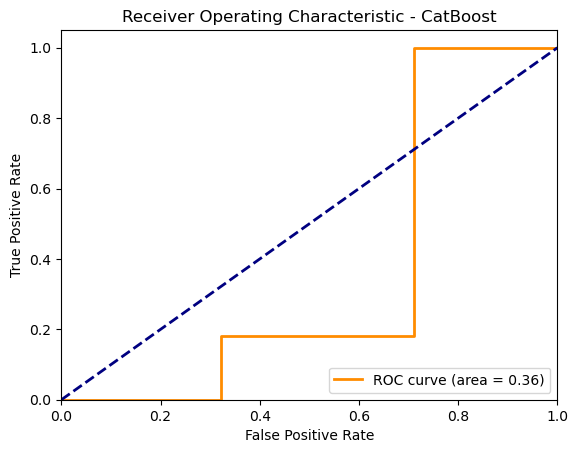

In [97]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Convert y_test to binary if needed
threshold = 0.5
y_test_binary = (y_test > threshold).astype(int)

# Train CatBoost model
catboost = CatBoostClassifier(verbose=0)
catboost.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = catboost.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - CatBoost')
plt.legend(loc="lower right")
plt.show()


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9

Generation 2 - Current best internal CV score: 0.9

Generation 3 - Current best internal CV score: 0.9

Generation 4 - Current best internal CV score: 0.9087500000000001

Generation 5 - Current best internal CV score: 0.9087500000000001

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, n_jobs=1, subsample=1.0, verbosity=0)
TPOT Performance (Accuracy): 0.91


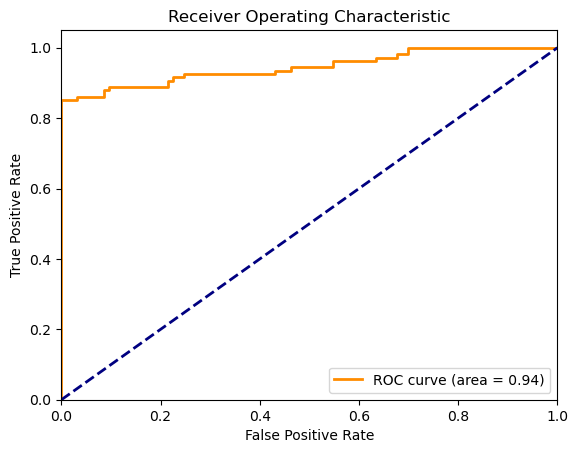

In [98]:
# Ensure all necessary imports and data preparation are done in the same cell
from tpot import TPOTClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Create a dataset for the sake of this example
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TPOT classifier
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2)

# Train TPOT model
tpot.fit(X_train, y_train)

# Evaluate the performance of the model
accuracy = tpot.score(X_test, y_test)
print("TPOT Performance (Accuracy):", accuracy)

# Assuming you have a binary classifier and the predictions are probabilistic
# Get the predicted probabilities (if not already done)
y_pred_proba = tpot.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
